In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 분석 목적: 시간대별 자전거 수요 예측
- Y: cnt (자전거 이용객) => 종속변수
- X: 그 외 => 독립변수

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/2. 파이썬 실습 교안/4. 인공지능/3.DL 실습 - 런던바이크/london_merged.csv"

df = pd.read_csv(path)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df = pd.read_csv(path, parse_dates=['timestamp']) # 날짜/시간 포맷에 대한 명시
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
date = "2015-01-04 00:00:00"
# 연도, 월, 일 / 시간, 분, 초

dates = date.split( )[0]
year = dates.split("-")[0]
month = dates.split("-")[1]
daya = dates.split("-")[2]

#time = date.split( )[1]
#time

['2015', '01', '04']

In [ ]:
# 결측치 체크
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
# 추가 컬럼 생성 (year, month, day)

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [ ]:
#df['year'].value_counts()
df['month'].value_counts().sort_values()
df['month'].value_counts().sort_index()

1     1487
2     1359
3     1468
4     1438
5     1488
6     1422
7     1481
8     1484
9     1394
10    1479
11    1430
12    1484
Name: month, dtype: int64

## 데이터 시각화

<Axes: xlabel='year', ylabel='cnt'>

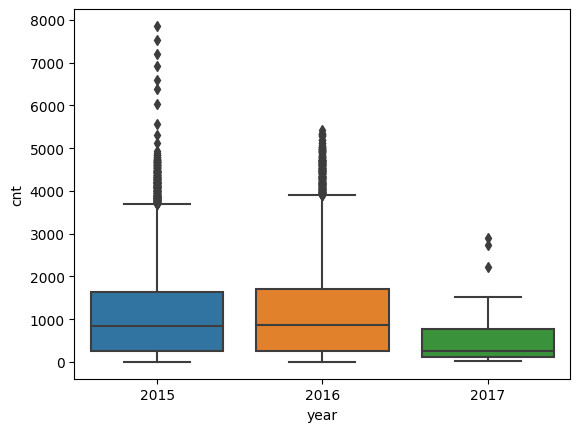

In [ ]:
sns.boxplot(x=df['year'], y=df['cnt'])

<Axes: xlabel='month', ylabel='cnt'>

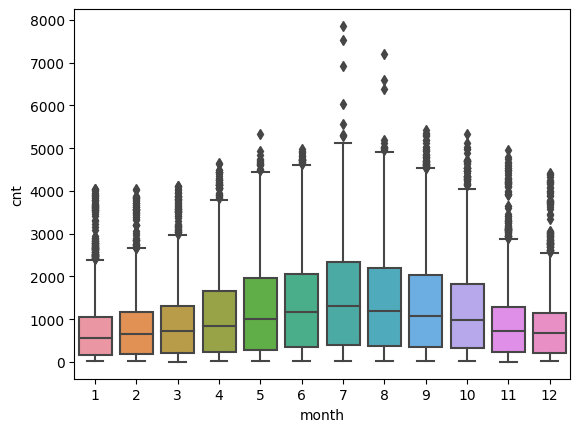

In [ ]:
sns.boxplot(x=df['month'], y=df['cnt'])

<Axes: xlabel='day', ylabel='cnt'>

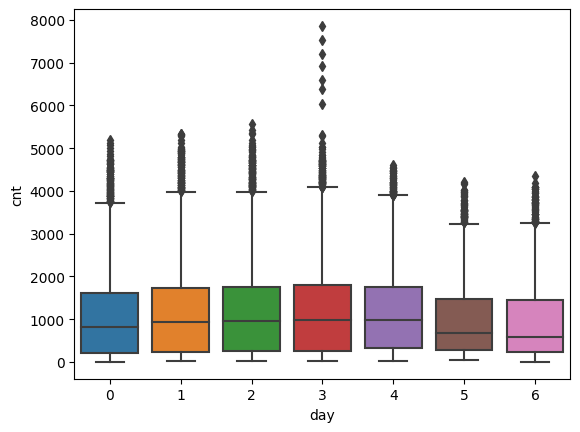

In [ ]:
sns.boxplot(x=df['day'], y=df['cnt']) # 월,화,수,목,금,토,일

<Axes: xlabel='hour', ylabel='cnt'>

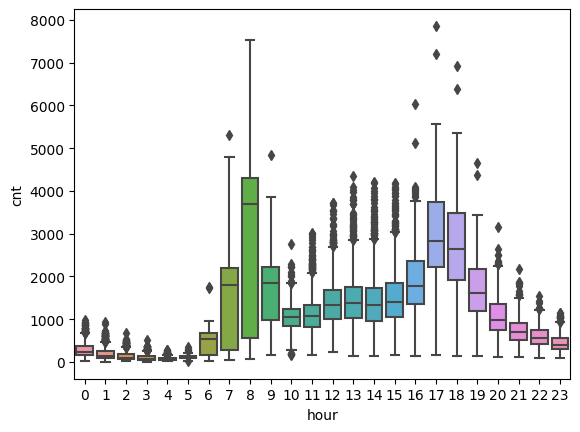

In [ ]:
sns.boxplot(x=df['hour'], y=df['cnt']) # 출,퇴근 시간에 자전거 이용이 집중되는 모습

## 이상치 제거

In [ ]:
# 시그마 이상치(Outlier) 제거
# - 양극단의 이상치를 제거하는 간단한 방법

![image.png](https://miro.medium.com/v2/resize:fit:1400/0*jBnB0iboGyU5EzVy.png)

In [ ]:
def is_outliers(data):
    lower_limit = data.mean() - (data.std() * 3)
    upper_limit = data.mean() + (data.std() * 3)

    return ~data.between(lower_limit, upper_limit)

In [ ]:
df_real = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print("이상치 제거 전 : ", df.shape)
print("이상치 제거 후 : ", df_real.shape)

이상치 제거 전 :  (17414, 14)
이상치 제거 후 :  (17265, 14)


<ipython-input-22-b4fad279c843>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_real = df[~df.groupby('hour')['cnt'].apply(is_outliers)]


In [ ]:
df_real

In [ ]:
df_real['weather_code'] = df_real['weather_code'].astype('category')
df_real['season'] = df_real['season'].astype('category')
df_real['year'] = df_real['year'].astype('category')
df_real['month'] = df_real['month'].astype('category')
df_real['hour'] = df_real['hour'].astype('category')

<ipython-input-23-916353de9c83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['weather_code'] = df_real['weather_code'].astype('category')
<ipython-input-23-916353de9c83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['season'] = df_real['season'].astype('category')
<ipython-input-23-916353de9c83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df_real.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
day                      int64
hour                  category
dtype: object

In [ ]:
# 머신러닝이 학습하기 용이한 데이터로 변경 => get_dummies()
df_real = pd.get_dummies(df_real, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_real.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,day,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_x = df_real.drop(['timestamp', 'cnt'], axis=1) # 독립변수 (feature data)
df_y = df_real['cnt'] # 종속변수 (target data)

In [ ]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [ ]:
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,day,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터 셋 분리 => 학습용, 테스트용
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=66)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (12085, 57)
y_train (12085,)
X_test (5180, 57)
y_test (5180,)


### 딥러닝 모형

In [ ]:
import keras # pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

# activation: relu
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               9280      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='min') # 과적합을 방지하기 위해 사용

# epochs: 훈련횟수, batch_size: , validation_split: 검증용 데이터셋 분리 => 과적합(overfitting)을 방지하기 위해
history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
10876/10876 [==============================] - 27s 2ms/step - loss: 549.9152 - mae: 549.9152 - val_loss: 396.3170 - val_mae: 396.3170
Epoch 2/10
10876/10876 [==============================] - 27s 3ms/step - loss: 333.2611 - mae: 333.2611 - val_loss: 263.7527 - val_mae: 263.7527
Epoch 3/10
10876/10876 [==============================] - 26s 2ms/step - loss: 260.1669 - mae: 260.1669 - val_loss: 243.4470 - val_mae: 243.4470
Epoch 4/10
10876/10876 [==============================] - 27s 2ms/step - loss: 223.7860 - mae: 223.7860 - val_loss: 206.9785 - val_mae: 206.9785
Epoch 5/10
10876/10876 [==============================] - 31s 3ms/step - loss: 200.3224 - mae: 200.3224 - val_loss: 188.4989 - val_mae: 188.4989
Epoch 6/10
10876/10876 [==============================] - 28s 3ms/step - loss: 184.6883 - mae: 184.6883 - val_loss: 175.7745 - val_mae: 175.7745
Epoch 7/10
10876/10876 [==============================] - 27s 3ms/step - loss: 174.2166 - mae: 174.2166 - val_loss: 154.6730 - val

In [ ]:
pred = model.predict(X_test)

In [ ]:
history.history['val_loss']
#history.history['loss']

[396.3170166015625,
 263.75274658203125,
 243.44699096679688,
 206.97850036621094,
 188.49893188476562,
 175.7745361328125,
 154.67303466796875,
 144.28175354003906,
 145.88128662109375,
 153.0836944580078]

### 머신러닝 모형

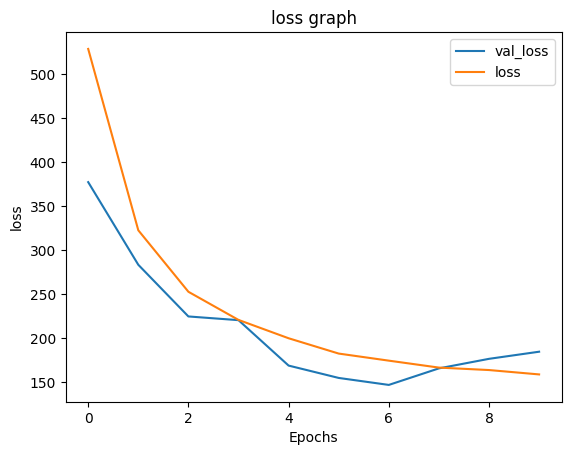

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("loss graph")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(['val_loss', 'loss'])
plt.show()

In [ ]:
# 딥러닝: 사람이 학습하는 방법을 흉내낸 것 -> 인공신경망 기반
# Xgboost, randomforest -> 기계학습

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_predict = model.predict(X_test)

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print("RMSE : " , RMSE(y_test, y_predict)) # RMSE가 낮을 수록 좋다.

162/162 [==============================] - 1s 3ms/step
RMSE :  282.0806722452116


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=16) # 100개의 모형을 만들겠다. / random_state: 값을 지정
rf.fit(X_train, y_train)
rf_result = rf.predict(X_test) # 테스트값을 기준으로 예측

print("RMSE : ", RMSE(y_test, rf_result))

RMSE :  243.7733002981449


In [ ]:
from xgboost import XGBRegressor # 분류 예측

xgb = XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(X_train, y_train)
xgb_result = xgb.predict(X_test)

print("RMSE : " , RMSE(y_test, xgb_result))

RMSE :  228.82336741467205


In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(X_train, y_train)
lgb_result = lgb.predict(X_test)

print("RMSE : ", RMSE(y_test, lgb_result))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 12085, number of used features: 56
[LightGBM] [Info] Start training from score 1135.451469
RMSE :  254.35663057411665


In [ ]:
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result) # random forest
dnn = pd.DataFrame(y_predict) # deap learning
lgb = pd.DataFrame(lgb_result)

df_compare = pd.DataFrame(y_test).reset_index(drop=True) # 실제 데이터

In [ ]:
df_compare['xgb'] = xgb
df_compare['rf'] = rf
df_compare['dnn'] = dnn
df_compare['lgb'] = lgb

df_compare.head()

,cnt,xgb,rf,dnn,lgb
0,541,527.301575,488.80,410.511688,493.368551
1,1327,1307.803589,1327.41,1168.435425,1261.789854
2,1273,1242.336670,1244.03,1211.152100,1409.244616
3,319,312.390808,345.77,295.677063,266.443702
4,1545,1520.832153,1535.87,1251.037109,1535.328080


<ipython-input-60-9a90f6ed8db8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_compare['cnt'], shade=True, color='r')
<ipython-input-60-9a90f6ed8db8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_compare['dnn'], shade=True, color='g')


<Axes: xlabel='cnt', ylabel='Density'>

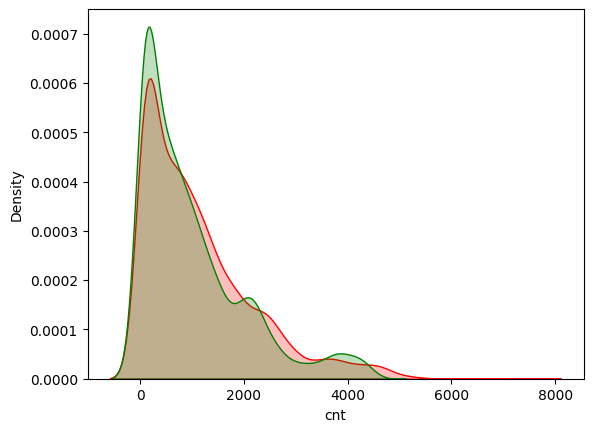

In [ ]:
sns.kdeplot(df_compare['cnt'], shade=True, color='r')
#sns.kdeplot(df_compare['xgb'], shade=True, color='b')
#sns.kdeplot(df_compare['rf'], shade=True, color='y')
sns.kdeplot(df_compare['dnn'], shade=True, color='g')
#sns.kdeplot(df_compare['lgb'], shade=True, color='w')